Author: Andreas Traut   
Basis for this notebook are various tutorials which I found on the internet and documentation from Tensorflow.   
Date: 11.09.2020

# What is "transfer learning"?

The question might be: why is this accuracy for the *"Caltechown"* example [here](Image_classification/Image_classifier_example_2_loadJPG_calculate_save_caltechown.ipynb) (implemented in Tensorflow) so much lower compared to the *"Caltech-101"* example, which I implemented in fastAI (see [here](https://github.com/AndreasTraut/Deep_learning_explorations))? The reason is **"transfer learning"**, which I will explain now: 

There are differents layers in a model and they serve differents aims. The initial layers are mostly for understanding low-level features and these layers should find e.g. curves, shapes, lines, patterns or shapes. The next layers capture high-level features, like the shape of an espresso cup. 

When you load a model from fastAI it will by default have all layers frozen with pre-trained weights. In other libraries you would need to freeze them, e.g. by using the command `learn.freeze()`. Freezing prevents, that well trained models, like the *"ResNet34"*, from being modified: gradients are not calculated for these layers. 

In the fastAI library the command `learn.fit_one_cycle(2)` trains only the last layer and all other layers are kept frozen. Afterwards in order to make all layers trainable the command `learn.unfreeze()` is used and all weights can get updated from the pre-trained state according to the chosen loss function. So we don't start from scatch on these layers: we start from a pre-trained point. 

This technique is called **"transfer learning"**: we want *"to use the knowledge gained from other models and use it for solving different but related problems"* (see [here](https://en.wikipedia.org/wiki/Transfer_learning)). In the *"Caltech-101"* example (see [here](https://github.com/AndreasTraut/Deep_learning_explorations)) I applied transfer learning by using the *"ResNet34"* model and pre-trained weights, but I didn't use this technique in the *"Caltechown"* example above. I can easily do this, as Tensorflow offers a lot of pretrained models, which can be used with very few lines of code, as you can see in my example [here](Image_classification/Image_classifier_example_2_transfer_learning_ResNet52.ipynb): I loaded the *"ResNet50"* model by using the pre-trained weigths from the ImageNet dataset (see `weights='imagenet'`) and applied it on my espresso cup picture (which is definitively not part of this dataset, because it's my own picture). The result is, that the model is 86% sure, that this is a "cup" and further 11.9% (6.7% plus 5.2%)  go to "coffepot or "coffee_mug", which is in total about 98% for something related to "cup" or "coffe". This is an impressive result specially because with four lines of code everyone can do this even without understanding the whole concept of deep-learning. 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.imagenet_utils import decode_predictions

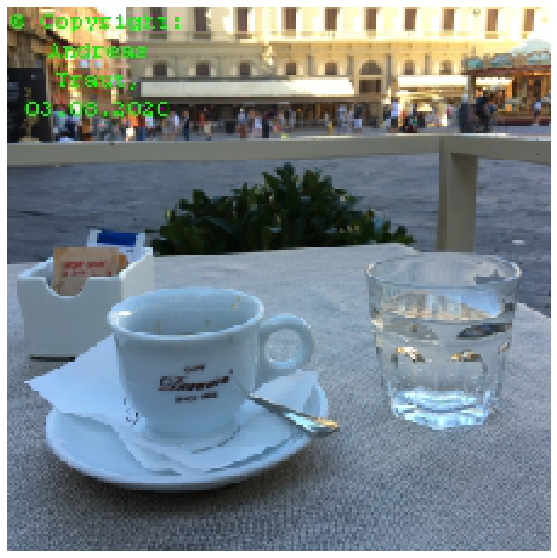

In [2]:
fig, ax = plt.subplots(1, figsize=(12, 10))
img = image.load_img('../../Deep_learning_explorations/data/caltechown/102/9145.JPG', target_size=(224, 224))
img = image.img_to_array(img)
ax.imshow(img / 255.) 
ax.axis('off')
plt.show()

In [3]:
resnet = ResNet50(weights='imagenet')
x = preprocess_input(np.expand_dims(img.copy(), axis=0))
preds = resnet.predict(x)
decode_predictions(preds, top=5)

[[('n07930864', 'cup', 0.86062807),
  ('n03063689', 'coffeepot', 0.06782799),
  ('n03063599', 'coffee_mug', 0.05167182),
  ('n03950228', 'pitcher', 0.0064888997),
  ('n04398044', 'teapot', 0.005076931)]]